In [1]:
import pandas as pd
import numpy as np
import time
import requests

### Carga del dataset

In [2]:
df = pd.read_csv("/home/sebas/Integrated-EDA-/data/Gaming_Mental_Health.csv")

In [3]:
df.head()

,record_id,age,gender,daily_gaming_hours,game_genre,primary_game,gaming_platform,sleep_hours,sleep_quality,sleep_disruption_frequency,...,continued_despite_problems,eye_strain,back_neck_pain,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gaming_addiction_risk_level
0,GD0001,17,Male,11.1,Mobile Games,Clash of Clans,PC,3.7,Very Poor,Sometimes,...,True,True,False,6.8,3.7,7,1.3,383.70,3,Severe
1,GD0002,21,Male,3.0,MOBA,Dota 2,PC,7.2,Fair,Rarely,...,False,False,False,0.4,8.5,2,10.7,46.64,1,Low
2,GD0003,23,Male,7.6,FPS,CS:GO,Multi-platform,4.4,Fair,Often,...,True,False,True,1.8,7.1,5,3.2,100.81,6,Severe
3,GD0004,20,Female,7.2,RPG,Skyrim,Multi-platform,5.1,Fair,Often,...,False,True,True,0.2,5.2,4,9.1,51.60,7,High
4,GD0005,18,Male,6.8,Battle Royale,Apex Legends,PC,3.4,Poor,Never,...,False,False,False,0.5,6.1,4,4.5,32.57,1,Moderate


### Limpieza de nombres de juegos que será la key para juntarlo con la Api en porcentaje

In [4]:
null_counts = (df.isnull().sum() / len(df)) * 100
print(null_counts)

record_id                            0.0
age                                  0.0
gender                               0.0
daily_gaming_hours                   0.0
game_genre                           0.0
primary_game                         0.0
gaming_platform                      0.0
sleep_hours                          0.0
sleep_quality                        0.0
sleep_disruption_frequency           0.0
academic_work_performance            0.0
grades_gpa                          24.6
work_productivity_score             32.6
mood_state                           0.0
mood_swing_frequency                 0.0
withdrawal_symptoms                  0.0
loss_of_other_interests              0.0
continued_despite_problems           0.0
eye_strain                           0.0
back_neck_pain                       0.0
weight_change_kg                     0.0
exercise_hours_weekly                0.0
social_isolation_score               0.0
face_to_face_social_hours_weekly     0.0
monthly_game_spe

Tratar estas columnas "grades_gpa" "work_productivity_score" lo mas seguro será eliminarlos.

Con esto se los valores unicos y tener una ligera idea de las columnas y podemos buscarlos cada columna

No tenemos ninguna fila duplicada.

In [5]:
print(df['gaming_platform'].value_counts())

gaming_platform
Mobile            262
Multi-platform    260
PC                241
Console           237
Name: count, dtype: int64


In [6]:
df['grades_gpa'] = df['grades_gpa'].fillna(df['grades_gpa'].median())
df['work_productivity_score'] = df['work_productivity_score'].fillna(0) # Asumimos 0 si no hay respuesta

In [7]:
df.isnull().sum() / len(df) * 100

record_id                           0.0
age                                 0.0
gender                              0.0
daily_gaming_hours                  0.0
game_genre                          0.0
primary_game                        0.0
gaming_platform                     0.0
sleep_hours                         0.0
sleep_quality                       0.0
sleep_disruption_frequency          0.0
academic_work_performance           0.0
grades_gpa                          0.0
work_productivity_score             0.0
mood_state                          0.0
mood_swing_frequency                0.0
withdrawal_symptoms                 0.0
loss_of_other_interests             0.0
continued_despite_problems          0.0
eye_strain                          0.0
back_neck_pain                      0.0
weight_change_kg                    0.0
exercise_hours_weekly               0.0
social_isolation_score              0.0
face_to_face_social_hours_weekly    0.0
monthly_game_spending_usd           0.0


## Dado que muchas de las apis no usan el nombre si no la etiqueta de APPID que descargare en un csv, y le hare un merge a mi dataset, pero primero me quedare solo con los Multi-platform y PC, ya que son los nombres que se encontraran en la api
### Y tambien los generos.

In [8]:
plataformas = ["PC"]
genero= ['MOBA', 'Battle Royale', 'Strategy', 'MMO', 'FPS', 'RPG']

df_filtro_plataforma = df[df["gaming_platform"].isin(plataformas)]
df_filtro_plataforma = df[df["game_genre"].isin(genero)]
#Ya con esto reduje mi dataset solo a los de PC y Mulitplitaforma


print(df_filtro_plataforma)

    record_id  age  gender  daily_gaming_hours     game_genre  \
1      GD0002   21    Male                 3.0           MOBA   
2      GD0003   23    Male                 7.6            FPS   
3      GD0004   20  Female                 7.2            RPG   
4      GD0005   18    Male                 6.8  Battle Royale   
6      GD0007   21    Male                 2.7            FPS   
..        ...  ...     ...                 ...            ...   
995    GD0996   15  Female                 8.6       Strategy   
996    GD0997   18    Male                 5.4            MMO   
997    GD0998   23    Male                 7.3            RPG   
998    GD0999   18    Male                 3.1       Strategy   
999    GD1000   29    Male                 3.5            RPG   

             primary_game gaming_platform  sleep_hours sleep_quality  \
1                  Dota 2              PC          7.2          Fair   
2                   CS:GO  Multi-platform          4.4          Fair   
3  

In [9]:
df_filtro_plataforma.primary_game.unique()

<StringArray>
[              'Dota 2',                'CS:GO',               'Skyrim',
         'Apex Legends',         'Call of Duty',    'Final Fantasy XIV',
         'StarCraft II',           'Elden Ring',    'League of Legends',
              'Warzone',       'Cyberpunk 2077',                 'PUBG',
    'World of Warcraft',       'Mobile Legends', 'Elder Scrolls Online',
             'Valorant',       'Age of Empires',      'Civilization VI',
             'Fortnite',            'Overwatch']
Length: 20, dtype: str

## Usamos esta lista para los appid encontrarlos en la Api de Steam los que tengan 0 no forman parte de Steam

In [10]:
lista_juegos_appid = [
    {"Title": "Dota 2", "appid": 570},
    {"Title": "CS:GO", "appid": 730},
    {"Title": "Skyrim", "appid": 489830},
    {"Title": "Apex Legends", "appid": 1172470},
    {"Title": "Call of Duty", "appid": 1938090},
    {"Title": "Final Fantasy XIV", "appid": 39210},
    {"Title": "StarCraft II", "appid": 0},          # Non-Steam (Battle.net)
    {"Title": "Elden Ring", "appid": 1245620},
    {"Title": "League of Legends", "appid": 0},     # Non-Steam (Riot)
    {"Title": "Warzone", "appid": 1962660},         # Compartido con Call of Duty
    {"Title": "Cyberpunk 2077", "appid": 1091500},
    {"Title": "PUBG", "appid": 578080},
    {"Title": "World of Warcraft", "appid": 0},     # Non-Steam (Battle.net)
    {"Title": "Mobile Legends", "appid": 0},        # Mobile
    {"Title": "Elder Scrolls Online", "appid": 306130},
    {"Title": "Valorant", "appid": 0},              # Non-Steam (Riot)
    {"Title": "Age of Empires", "appid": 813780},   # Age of Empires II: DE
    {"Title": "Civilization VI", "appid": 289070},
    {"Title": "Fortnite", "appid": 0},              # Non-Steam (Epic Games)
    {"Title": "Overwatch", "appid": 2357570}        # Overwatch 2 en Steam
]

## Creo un dataframe 
df_nombres_steam = pd.DataFrame(lista_juegos_appid)

## Hacemos un merge entre estas 2 dataframes

In [11]:
# 2. Asegurar que ambos tengan la misma llave (UPPERCASE)
df_nombres_steam['primary_key'] = df_nombres_steam['Title'].str.upper().str.strip()
df_filtro_plataforma['primary_key'] = df_filtro_plataforma['primary_game'].str.upper().str.strip()

# 3. Realizar el merge quirúrgico
df_final = pd.merge(
    df_filtro_plataforma, 
    df_nombres_steam[['primary_key', 'appid']], 
    on='primary_key', 
    how='left'
)

## Como vamos a usar ya vamos a usar un api que se sobreenetiende que va a ser PC, borramos esa columna de gaming_platform

In [12]:
API_LEY = "5894E09D101E4E259D48A30013133A59"

## Conexion con SteamSpy

In [13]:
appids_unicos = [int(id) for id in df_final['appid'].unique() if id > 0]
dict_stats_steam = {}

print(f"Iniciando extracción para {len(appids_unicos)} juegos únicos...")

for aid in appids_unicos:
    # A) Jugadores concurrentes (Masa Social)
    url_players = f"https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid={aid}"
    
    # B) Detalles de la tienda (MMO, Multi, Recomendaciones)
    url_details = f"https://store.steampowered.com/api/appdetails?appids={aid}&l=spanish"
    
    try:
        # Petición A
        res_p = requests.get(url_players).json()
        players = res_p['response'].get('player_count', 0) if res_p['response']['result'] == 1 else 0
        
        # Petición B
        res_d = requests.get(url_details).json()
        es_mmo, es_multi, popularidad = 0, 0, 0
        
        if res_d and res_d[str(aid)]['success']:
            data = res_d[str(aid)]['data']
            
            # --- NUEVOS DATOS RELEVANTES ---
            es_gratis = 1 if data.get('is_free') else 0
            nota_critica = data.get('metacritic', {}).get('score', 0) # Si no tiene, ponemos 0
            conteo_dlc = len(data.get('dlcs', []))
            # -------------------------------

            cats = [c['description'] for c in data.get('categories', [])]
            es_mmo = 1 if 'MMO' in cats else 0
            es_multi = 1 if 'Multi-player' in cats or 'En línea' in cats else 0
            popularidad = data.get('recommendations', {}).get('total', 0)
        
        # Actualizamos el diccionario
        dict_stats_steam[aid] = {
            'steam_players_now': players,
            'social_popularity_score': popularidad,
            'is_free': es_gratis,        # Nuevo
            'metacritic_score': nota_critica # Nuevo
        }
        print(f"✅ AppID {aid} procesado.")
        
    except Exception as e:
        print(f"⚠️ Error en AppID {aid}: {e}")
    
    time.sleep(1) 


df_final['steam_players_now'] = df_final['appid'].map(lambda x: dict_stats_steam.get(x, {}).get('steam_players_now', 0))
df_final['social_popularity_score'] = df_final['appid'].map(lambda x: dict_stats_steam.get(x, {}).get('social_popularity_score', 0))

df_final['is_free'] = df_final['appid'].map(lambda x: dict_stats_steam.get(x, {}).get('is_free', 0))
df_final['metacritic_score'] = df_final['appid'].map(lambda x: dict_stats_steam.get(x, {}).get('metacritic_score', 0))


Iniciando extracción para 14 juegos únicos...
✅ AppID 570 procesado.
✅ AppID 730 procesado.
✅ AppID 489830 procesado.
✅ AppID 1172470 procesado.
✅ AppID 1938090 procesado.
✅ AppID 39210 procesado.
✅ AppID 1245620 procesado.
✅ AppID 1962660 procesado.
✅ AppID 1091500 procesado.
✅ AppID 578080 procesado.
✅ AppID 306130 procesado.
✅ AppID 813780 procesado.
✅ AppID 289070 procesado.
✅ AppID 2357570 procesado.


In [14]:
# Columnas finales para el estudio de Salud Mental vs. Métricas de Steam
columnas_finales = [
    # 1. Datos Demográficos y Salud (Dataset Original)
    'age', 'gender', 'mood_state', 'gaming_addiction_risk_level',
    'social_isolation_score', 'face_to_face_social_hours_weekly', 
    'sleep_hours', 'daily_gaming_hours', 'years_gaming',
    'monthly_game_spending_usd', 'game_genre',
    
    # 2. El Identificador
    'primary_game', 'appid',
    
    # 3. Métricas de Adicción Social (Nuevas de Steam)
    'social_popularity_score',  # Recomendaciones de la comunidad
    'is_free',                  # Modelo de negocio (F2P vs Pago)
    'metacritic_score',
    'steam_players_now'         # Calidad técnica del juego
]


df_estudio = df_final[columnas_finales]

print(df_estudio.info())

<class 'pandas.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               861 non-null    int64  
 1   gender                            861 non-null    str    
 2   mood_state                        861 non-null    str    
 3   gaming_addiction_risk_level       861 non-null    str    
 4   social_isolation_score            861 non-null    int64  
 5   face_to_face_social_hours_weekly  861 non-null    float64
 6   sleep_hours                       861 non-null    float64
 7   daily_gaming_hours                861 non-null    float64
 8   years_gaming                      861 non-null    int64  
 9   monthly_game_spending_usd         861 non-null    float64
 10  game_genre                        861 non-null    str    
 11  primary_game                      861 non-null    str    
 12  appid              

In [15]:
df_estudio.head(10)

,age,gender,mood_state,gaming_addiction_risk_level,social_isolation_score,face_to_face_social_hours_weekly,sleep_hours,daily_gaming_hours,years_gaming,monthly_game_spending_usd,game_genre,primary_game,appid,social_popularity_score,is_free,metacritic_score,steam_players_now
0,21,Male,Irritable,Low,2,10.7,7.2,3.0,1,46.64,MOBA,Dota 2,570,14367,1,90,515589
1,23,Male,Irritable,Severe,5,3.2,4.4,7.6,6,100.81,FPS,CS:GO,730,4948349,1,0,1001604
2,20,Female,Withdrawn,High,4,9.1,5.1,7.2,7,51.60,RPG,Skyrim,489830,206568,0,74,26369
3,18,Male,Angry,Moderate,4,4.5,3.4,6.8,1,32.57,Battle Royale,Apex Legends,1172470,1573,1,88,49773
4,21,Male,Euphoric,Low,2,10.1,7.2,2.7,3,35.25,FPS,Call of Duty,1938090,406059,0,0,37987
5,18,Male,Anxious,Severe,6,4.6,3.5,7.6,6,135.20,MMO,Final Fantasy XIV,39210,76670,0,83,17371
6,16,Male,Restless,Low,1,11.0,8.4,1.5,4,28.23,FPS,CS:GO,730,4948349,1,0,1001604
7,14,Male,Normal,Low,1,13.9,7.2,3.0,3,46.36,Strategy,StarCraft II,0,0,0,0,0
8,22,Male,Anxious,Low,3,6.3,5.3,5.1,5,36.07,RPG,Skyrim,489830,206568,0,74,26369
9,21,Male,Restless,Low,3,9.0,5.2,5.8,2,104.01,RPG,Elden Ring,1245620,806113,0,94,24521


### Hay que borrar los que tienen un appide de 0 estos son juegos que no estan dentro de la api de steam

In [18]:
df_estudio = df_estudio[df_estudio['appid']>0]
df_estudio.columns

Index(['age', 'gender', 'mood_state', 'gaming_addiction_risk_level',
       'social_isolation_score', 'face_to_face_social_hours_weekly',
       'sleep_hours', 'daily_gaming_hours', 'years_gaming',
       'monthly_game_spending_usd', 'game_genre', 'primary_game', 'appid',
       'social_popularity_score', 'is_free', 'metacritic_score',
       'steam_players_now'],
      dtype='str')

# Graficas:

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Correlacion de calor


Variables:
    social_isolation_score, daily_gaming_hours, steam_players_now, metacritic_score, social_popularity_score

Existe una correlacion positiva entre la masa de los jugadores de steam y aislamiento social


Text(0.5, 1.0, 'Mapa de correlacion salud mental vs metricas steam')

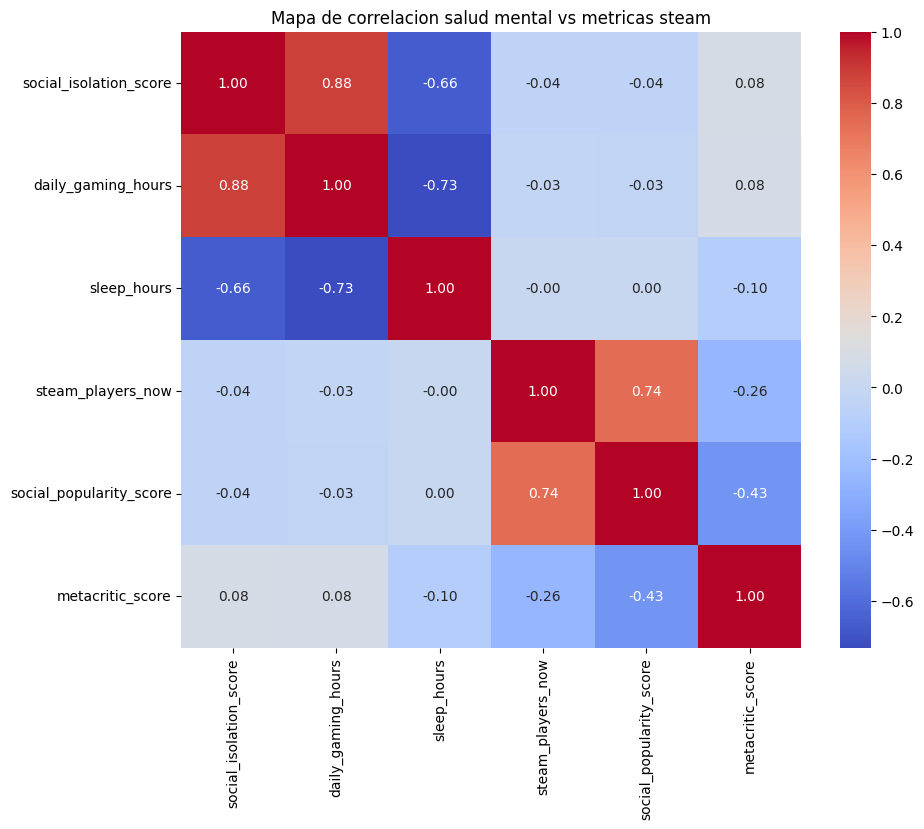

In [20]:
columnas_corr = ['social_isolation_score', 'daily_gaming_hours', 'sleep_hours', 
             'steam_players_now', 'social_popularity_score', 'metacritic_score']

plt.figure(figsize=(10,8))
sns.heatmap(df_estudio[columnas_corr].corr(), annot=True, cmap= 'coolwarm', fmt = ".2f")
plt.title("Mapa de correlacion salud mental vs metricas steam")

### Precio de adiccion:

eje x: gaming_addiction_risk_level

eje y: daily_gaming_hours

hue: is_free

Esto demostraria el impacto del modelo de negocio en la adiccion

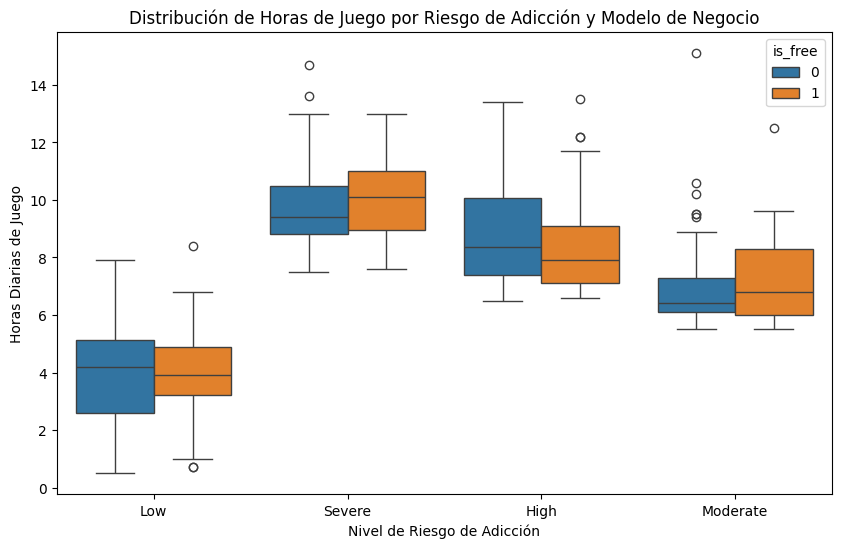

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_estudio, x='gaming_addiction_risk_level', y='daily_gaming_hours', hue='is_free')
plt.title("Distribución de Horas de Juego por Riesgo de Adicción y Modelo de Negocio")
plt.xlabel("Nivel de Riesgo de Adicción")
plt.ylabel("Horas Diarias de Juego")
plt.show()

Como se aprecia en la grafica justo en los extremos, cuando la adiccion es poca o muy alta, casi siempre no son gratuitos mientras que cuando el riesgo de adiccion es moderado o severo, en su mayoria los juegos son gratis, y que las horas que la gente le dedica es mayor.

### Popularidad vs aislamiento

Eje x: socia_populairy_Score

Eje y: face_to_face_social_hours_weekly

Si la linea de tendencia es descendete se confirma que los juegos con comunidades masivas en Steam.

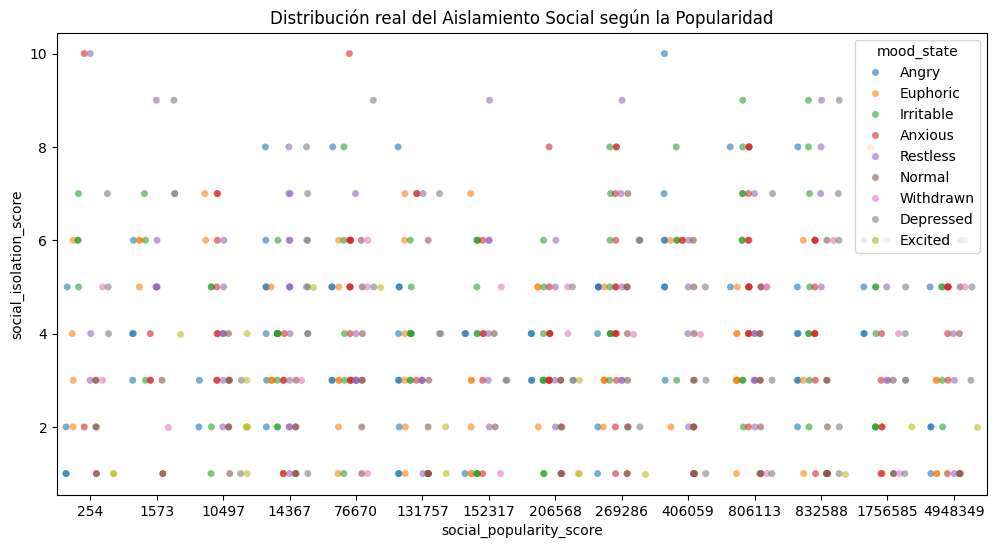

In [ ]:
plt.figure(figsize=(12, 6))

sns.stripplot(data=df_estudio, x='social_popularity_score', y='social_isolation_score', 
              hue='mood_state', alpha=0.6, jitter=True, dodge=True)
plt.title("Distribución real del Aislamiento Social según la Popularidad")
plt.show()

A simple vista, no parece haber una correlación lineal clara y directa (una línea recta ascendente o descendente) entre la popularidad del juego y el aislamiento. Los niveles de aislamiento altos y bajos aparecen tanto en juegos de baja popularidad como en los de alta popularidad

### Estado de animo y calidad de sueño:

Eje x: mood_state
Eje y: Sleep_hours

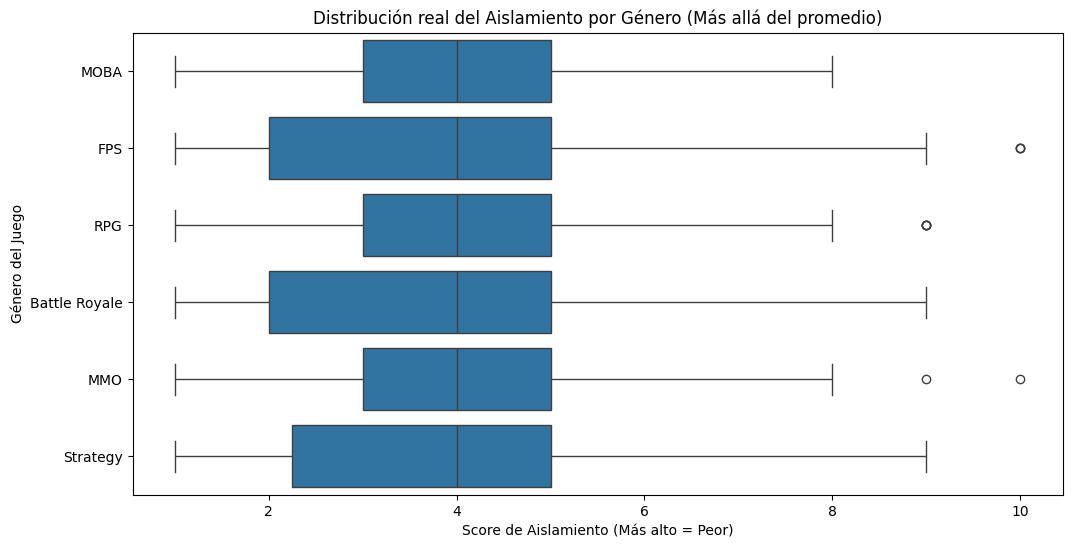

In [ ]:
plt.figure(figsize=(12, 6))
# Usamos boxplot para ver la dispersión real, no solo la media
sns.boxplot(data=df_estudio, x='social_isolation_score', y='game_genre')
plt.title("Distribución real del Aislamiento por Género")
plt.xlabel("Score de Aislamiento (Más alto = Peor)")
plt.ylabel("Género del Juego")
plt.show()

Hay una alineacion perfecta entre entre las lineas verticales dentro de las cajas(medianas) esta ncasi todas en la misma posicion, el 5.
El rango donde se mueve las mayoria  de los juegos es igua para los MOBA, RPG, MMO
El genero no determina el aislamiento social. Todas los generos tienen exactamente la misma probabilidad de estar aislado 